### Load libraries

In [1]:
import pathlib
from typing import Dict, List, Union

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Load data

In [2]:
match_path = pathlib.Path("../tests/testdata/elo_match_summary.txt")
# match_path = pathlib.Path("/nas/ucb/tony/go-attack/matches/visit-exp2/summary.txt")
lines = match_path.read_text().splitlines()

elo_lines_start_idx = lines.index("Elos (+/- one approx standard error):")
elo_lines_end_idx = lines.index(
    "Pairwise approx % likelihood of superiority of row over column:"
)
elo_lines = lines[elo_lines_start_idx + 1 : elo_lines_end_idx]

bot_entries: List[Dict[str, Union[float, int, str]]] = []
for elo_line in elo_lines:
    name = elo_line.split(" ")[0]
    bot_entries.append(
        {
            "name": name,
            "rank": name[3],
            "visits": int(name.split("-v")[1]),
            "elo": float(elo_line.split(":")[1].split("+/-")[0]),
            "std": float(elo_line.split("+/-")[1]),
        }
    )

bot_entries[-1]

{'name': 'botC-v1', 'rank': 'C', 'visits': 1, 'elo': -1162.429, 'std': 18.738}

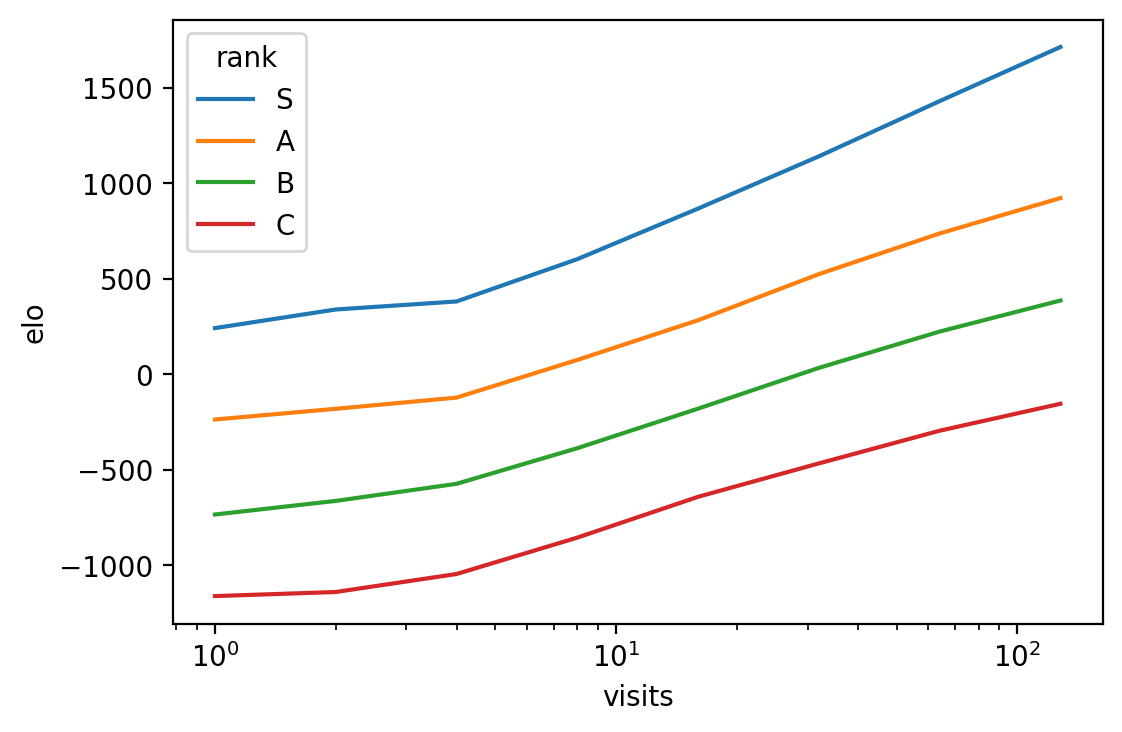

In [3]:
df = pd.DataFrame(bot_entries)
plt.figure(dpi=200)
sns.lineplot(data=df, x="visits", y="elo", hue="rank")
plt.xscale("log")
# df.plot.scatter(x="visits", y="elo", c="rank")
# plt.xscale("log")